# Week 1 - Exercise

*This exercise considers an example of data that do not satisfy all the standard assumptions of simple regression.
In the considered case, one particular observation lies far off from the others, that is, it is an outlier. This violates
assumptions A3 and A4, which state that all error terms εi are drawn from one and the same distribution with
mean zero and fixed variance σ2. The dataset contains twenty weekly observations on sales and advertising of a
department store. The question of interest lies in estimating the effect of advertising on sales. One of the weeks
was special, as the store was also open in the evenings during this week, but this aspect will first be ignored in the
analysis*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path

%matplotlib notebook

In [2]:
base_dir = os.path.join('',Path(os.getcwd()).parents[0])
data_dir = os.path.join(base_dir, 'Data')

In [3]:
data = pd.read_excel(data_dir+'/Dataw1.xls')
outlier = data['Sales'].idxmax()
print(outlier)
data.head()

11


,Observation,Advertising,Sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23


In [4]:
out_outlier = data.drop(11)
out_outlier.head()

,Observation,Advertising,Sales
0,1,12,24
1,2,12,27
2,3,9,25
3,4,11,27
4,5,6,23


### a) Make the scatter diagram with sales on the vertical axis and advertising on the horizontal axis. What do you expect to find if you would fit a regression line to these data?

<IPython.core.display.Javascript object>


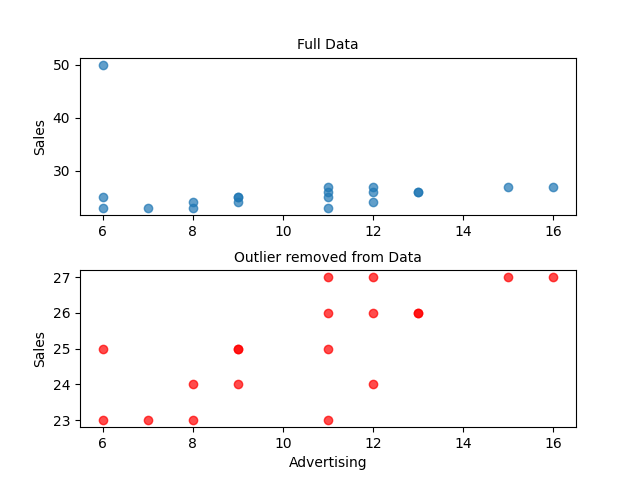

Text(0.5, 1.0, 'Full Data')

In [5]:
plt.figure()
ax1=plt.subplot(211)
ax1.scatter(data['Advertising'],data['Sales'],alpha=0.7);
plt.gca().set_ylabel('Sales')
plt.gca().set_title('Full Data',size=10)

In [6]:
ax2=plt.subplot(212,sharex=ax1)
ax2.scatter(out_outlier['Advertising'],out_outlier['Sales'],alpha=0.7,color='red');
plt.gca().set_ylabel('Sales')
plt.gca().set_xlabel('Advertising')
plt.gca().set_title('Outlier removed from Data',size=10)
plt.subplots_adjust(hspace=0.35)
plt.show()

**For the real full data, displayed on the left-hand side, we would expect a regression line that would not be representative of the actual trend, as there is an outlier that would move it up and left, getting it negative. Actually, as we can see displayed on the right scatter, there is a clear direct correlation between investment and sales, that is actually perverted by the outlier -a week in which sales are massively higher with a relatively low advertising, due to an increase in the number of opening hours, which is a variable that is not shown on the dataset-. Correlation for the full dataset would be, therefore, clearly lower.**

### b) Estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also compute the standard error and t-value of b. Is b significantly different from 0?

In [7]:
data = data.rename(columns={"Sales": "y", "Advertising": "x"})
data.head(0)

,Observation,x,y


**a** = y_ - bx_

**b** = S (y* )(x* ) / S (x*)^2

In [8]:
x_ = data['x'].describe().loc['mean']
x_

10.25

In [9]:
y_ = data['y'].describe().loc['mean']
y_

26.3

In [10]:
data['x*'] = data['x'] - x_
data['y*'] = data['y'] - y_
data.head()

,Observation,x,y,x*,y*
0,1,12,24,1.75,-2.3
1,2,12,27,1.75,0.7
2,3,9,25,-1.25,-1.3
3,4,11,27,0.75,0.7
4,5,6,23,-4.25,-3.3


In [11]:
b = sum(data['x*']*data['y*']) / sum(data['x*']**2)
b

-0.3245749613601237

In [12]:
a = y_ - b*x_
a

29.62689335394127

In [13]:
data['e'] = data['y'] - a - b*data['x']
data.head()

,Observation,x,y,x*,y*,e
0,1,12,24,1.75,-2.3,-1.731994
1,2,12,27,1.75,0.7,1.268006
2,3,9,25,-1.25,-1.3,-1.705719
3,4,11,27,0.75,0.7,0.943431
4,5,6,23,-4.25,-3.3,-4.679444


In [14]:
e_abs = abs(data['e']).describe().loc['mean'].round(2)
e_abs

3.08

**y = 29.63 - 0.32x**

According to this regression line, more investment in advertising would lead to less sales

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


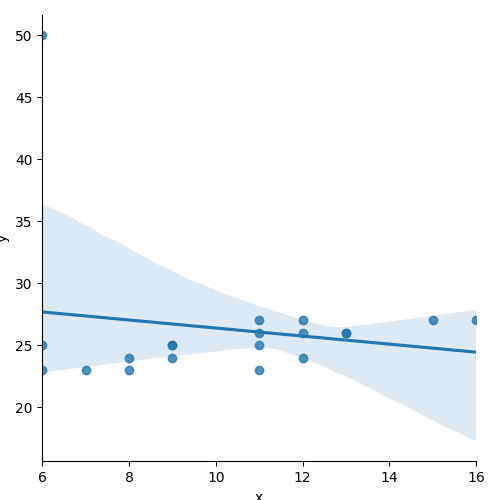

In [15]:
import seaborn as sns
sns.lmplot('x', 'y', data, order=1)

**Ho:β=0     //     Ha= β!=0**

In [16]:
from scipy import stats

In [17]:
b, a, r_value, p_value, std_err = stats.linregress(x=data['x'],y=data['y'])
rsq = r_value**2
print('b = {}'.format(b.round(2)))
print('a = {}'.format(a.round(2)))
print(p_value)
print(std_err)
print(rsq)

b = -0.32
a = 29.63
0.4884540142093604
0.4589109758029107
0.02703932953253966


**SEb = 0.4589**

In [18]:
ttest=stats.ttest_ind(data['x'],data['y'])
ttest
tvalue = ttest[0].round(2)

**tvalue = -11.12**

In [19]:
pvalue = ttest[1]
print('p_value = {}'.format(pvalue))

p_value = 1.6571833890206197e-13


**As pvalue is actually 0.0, which is obviously < than 0.05, we can reject the null hypothesis and conclude that there's a statistically significant difference from 0 for the value of b with a 95% of confidence**

In [20]:
FDG = data.shape[0]-2
FDG

18

**95% confidence interval of β:**

-0.32 - 2.101 * 0.4589 <= β >= -0.32 + 2.101 * 0.4589

In [21]:
lp = (b-2.101*std_err).round(2)
hp = (b+2.101*std_err).round(2)
print('95% confidence interval of \u03B2:')
print(str(lp) + ' <= \u03B2 >= ' + str(hp))

95% confidence interval of β:
-1.29 <= β >= 0.64


### c) Compute the residuals and draw a histogram of these residuals. What conclusion do you draw from this histogram?


In [22]:
data['e'].head(3)

0   -1.731994
1    1.268006
2   -1.705719
Name: e, dtype: float64

In [23]:
data['e'].describe().iloc[:3]

count    2.000000e+01
mean    -1.976197e-15
std      5.680807e+00
Name: e, dtype: float64

<IPython.core.display.Javascript object>


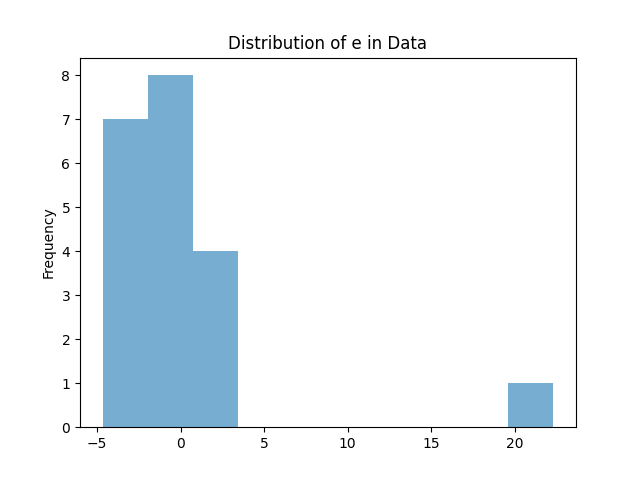

In [24]:
plt.figure()
plt.hist(data['e'],bins=10,alpha=0.6);
plt.ylabel('Frequency')
plt.title('Distribution of e in Data')
plt.yticks(np.arange(0, 9,1));

In [25]:
stats.kurtosis(data['e'])

10.282601127554958

In [26]:
stats.skew(data['e'])

3.178012049426174

**The distribution of the residuals would look normal if the outlier were taken out from the data. Mean is quite close to 0, while std is deeply influenced by the outlier. As we can see via the kurtosis and skew indicators, the distribution looks quite sharp, while it is clearly oriented towards the right hand side**

In [27]:
out_outlier = data.drop(11)
out_outlier

,Observation,x,y,x*,y*,e
0,1,12,24,1.75,-2.3,-1.731994
1,2,12,27,1.75,0.7,1.268006
2,3,9,25,-1.25,-1.3,-1.705719
3,4,11,27,0.75,0.7,0.943431
4,5,6,23,-4.25,-3.3,-4.679444
5,6,9,25,-1.25,-1.3,-1.705719
6,7,15,27,4.75,0.7,2.241731
7,8,6,25,-4.25,-1.3,-2.679444
8,9,11,26,0.75,-0.3,-0.056569
9,10,16,27,5.75,0.7,2.566306


In [28]:
stats.kurtosis(out_outlier['e'])

-1.1462223683083386

In [29]:
stats.skew(out_outlier['e'])

0.06649279816529453

**These shape indicators look pretty much normal taking out the outlier from the database**

### d) Apparently, the regression result of part (b) is not satisfactory. Once you realize that the large residual corresponds to the week with opening hours during the evening, how would you proceed to get a more satisfactory regression model?

<IPython.core.display.Javascript object>


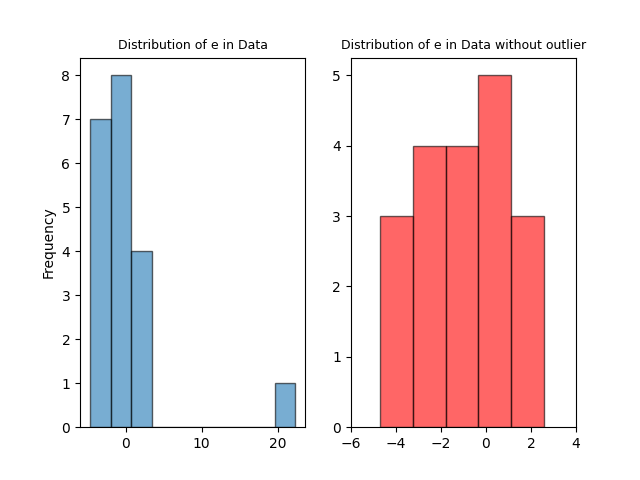

Text(0.5, 1.0, 'Distribution of e in Data')

In [30]:
plt.figure()
ax1=plt.subplot(121)
ax1.hist(data['e'],bins=10,alpha=0.6,edgecolor='black');
plt.gca().set_ylabel('Frequency')
plt.gca().set_title('Distribution of e in Data',size=9)

In [31]:
ax2=plt.subplot(122)
ax2.hist(out_outlier['e'],bins=5,alpha=0.6,color='red',edgecolor='black');
plt.gca().set_title('Distribution of e in Data without outlier',size=9)
plt.xticks(np.arange(-6, 6,2));

**A logic way to proceed is taking out the outlier from the analysis, as it is not only non-representive, but also corruptive for the whole process, having a clear influence in the final outcome.**

### e) Delete this special week from the sample and use the remaining 19 weeks to estimate the coefficients a and b in the simple regression model with sales as dependent variable and advertising as explanatory factor. Also compute the standard error and t-value of b. Is b significantly different from 0?

In [32]:
out_outlier = data.drop(11)
out_outlier

,Observation,x,y,x*,y*,e
0,1,12,24,1.75,-2.3,-1.731994
1,2,12,27,1.75,0.7,1.268006
2,3,9,25,-1.25,-1.3,-1.705719
3,4,11,27,0.75,0.7,0.943431
4,5,6,23,-4.25,-3.3,-4.679444
5,6,9,25,-1.25,-1.3,-1.705719
6,7,15,27,4.75,0.7,2.241731
7,8,6,25,-4.25,-1.3,-2.679444
8,9,11,26,0.75,-0.3,-0.056569
9,10,16,27,5.75,0.7,2.566306


In [33]:
b_out, a_out, r_value_out, p_value_out, std_err_out = stats.linregress(x=out_outlier['x'],y=out_outlier['y'])
print('b = {}'.format(b_out.round(3)))
print('a = {}'.format(a_out.round(3)))

b = 0.375
a = 21.125


In [34]:
print('std_b = {}'.format(std_err_out.round(2)))

std_b = 0.09


In [35]:
stats.ttest_ind(out_outlier['x'],out_outlier['y'])
t_value_out = stats.ttest_ind(out_outlier['x'],out_outlier['y'])[0].round(2)
p_value_out = stats.ttest_ind(out_outlier['x'],out_outlier['y'])[1].round(2)
print('t_value = {}'.format(t_value_out))
print('p_value = {}'.format(p_value_out))

t_value = -20.0
p_value = 0.0


In [36]:
FDG_ = out_outlier.shape[0]-2
FDG_

17

In [37]:
lp_ = (b_out-2.11*std_err_out).round(2)
hp_ = (b_out+2.11*std_err_out).round(2)
print('95% confidence interval of \u03B2:')
print(str(lp_) + ' <= \u03B2 >= ' + str(hp_))

95% confidence interval of β:
0.19 <= β >= 0.56


In [38]:
print('y_out = {} + {}x'.format(a_out,b_out))

y_out = 21.125 + 0.375x


*y' = 21.125 + 0.375x*

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>


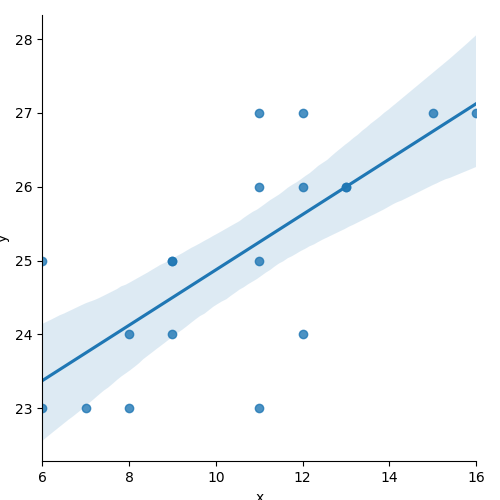

In [39]:
sns.lmplot('x', 'y', out_outlier, order=1)

### e) Discuss the differences between your findings in parts (b) and (e). Describe in words what you have learned from these results.

**The estimated parameter b is now positive, which means the relationship between investment and returns is now positive, which makes more sense. Let's remember that the standard error of b for the whole data WITH the outlier was 0.46. Removing the outlier, we get a std closer to 0, which guarantees us a better estimation. The t statistic shows that it is not likely, with a 95% of confidence, a β parameter being equal to 0. Having this confidence, the probability of β=0 is 0, according to p-value. The confidence interval of β shows what we found out before. there is no chance of a population slope equal to 0, given that the minimum value, with 17 degrees of freedom and a 95% confidence, is 0.19.**

<IPython.core.display.Javascript object>


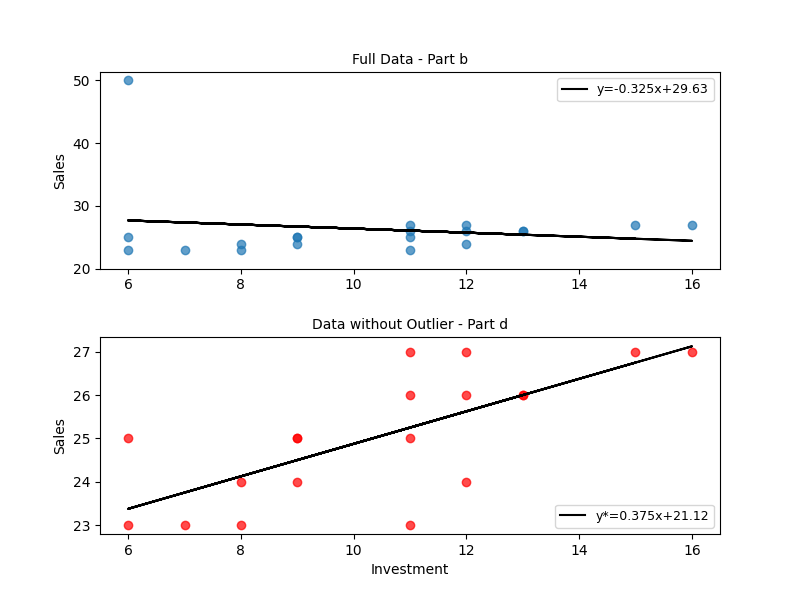

In [40]:
plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
ax1.scatter(data['x'],data['y'],alpha=0.7);
plt.gca().set_ylabel('Sales',size=10)
ax1.set_title('Full Data - Part b',size=10)
ax1.plot(data['x'], b*data['x'] + a, label='y={:.3f}x+{:.2f}'.format(b,a),color='black')
plt.xticks(np.arange(6, 18,2));
plt.yticks(np.arange(20,60,10))
ax1.legend(fontsize=9)

In [41]:
ax2=plt.subplot(212,sharex=ax1)
ax2.scatter(out_outlier['x'],out_outlier['y'],alpha=0.7,color='red');
plt.gca().set_ylabel('Sales',size=10)
plt.gca().set_xlabel('Investment',size=10)
ax2.plot(out_outlier['x'], b_out*out_outlier['x'] + a_out, label='y*={:.3f}x+{:.2f}'.format(b_out,a_out),color='black')
ax2.set_title('Data without Outlier - Part d',size=10)
ax2.legend(fontsize=9,loc='lower right')
plt.xticks(np.arange(6, 18,2));
plt.subplots_adjust(hspace=0.35)
plt.show()